# Design patterns

## I- The Adapter

### 1. Everyday life examples

In [5]:
from solutions import solution
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "img/car_to_rail_adapter.png", width=500, height=500)

In [2]:
Image(url= "img/plug_adapter.png", width=300, height=300)

### 2. Theory

### 3. First example

#### a) Context

In [3]:
class Service():
    """
    Service class is compatible with client code
    """
    def name(self):
        return "usual service"
    
    def request(self):
        return "Service works fine with client code"

def client_code(service: "Service") -> None:
    print(service.request())

usual_service = Service()
client_code(usual_service)

Service works fine with client code


In [4]:
class NewService():
    """
    We would like NewService instance to be compatible with client code.
    But its behavior is not compatible.
    """
    def name(self):
        return "new service"
    
    def specific_request(self):
        return "!oot edoc tneilc htiw enif skrow ecivres wen eht woN"

new_service = NewService()
client_code(new_service)

AttributeError: 'NewService' object has no attribute 'request'

#### b) Practice

In [6]:
print(solution.exercise_1.task())
print(solution.exercise_1.goal())
print(solution.exercise_1.solution())

Task:  Create an Adapter class which allows NewService instance to be compatible with client code.
Goal:  Montrer que l'on peut faire de l'héritage multiple en Python Montrer qu'il faut que le nouveau service implémente l'interface de l'ancien service
Solution:  
    class Adapter(NewService):
        '''
        Adapter allows NewService instance to be compatible with client code.
        The client is now compatible with NewService instance through the Adapter.
        Adapter changes NewService interface so that it is understandable by client code.
        Adapter makes as if it was an Service instance.
        '''
        def request(self):
            new_service_req = self.specific_request()
            return new_service_req[::-1]
    adapter = Adapter()
    client_code(adapter)
    


Objectif: Montrer que l'on peut faire de l'héritage multiple en Python
Montrer qu'il faut que le nouveau service implémente l'interface de l'ancien service

In [ ]:
def client_code(service: "Service") -> None:
    print(service.request())

    if isinstance(service, Service):
        print(f"{service.name()} is of type Service")
    else:
        print(f"But wait, {service.name()} makes as if it were of type Service, but it's not! It's of type {type(service)}")
    print("\n")

In [ ]:

print(solution.exercise_2.task())
print(solution.exercise_2.goal())
print(solution.exercise_2.solution())

### 4. Second example

Context: You have a legacy code where polylines are today's tekyntools objects.
You already know that your polyline data structure will evolve towards numpy arrays.
You need to create a brand new module. You choose to use numpy instead of current polylines
so that you're code would as close as possible from your future polyline implementation.

In [9]:
from tekyntools.geometryObjects import geometric_form, vertex, polyline
import matplotlib.pyplot as plt


class SectionSelector():
    def __init__(self, limit, placement):
        self.limit = limit
        self.placement = placement

    def filter(self):
        return [poly for poly in self.placement if max(poly.y_coords) < self.limit]


def plot_polylines(polylines, title):
    for poly in polylines:
        plt.plot(poly.x_coords, poly.y_coords)
        plt.title(title)
    plt.show()

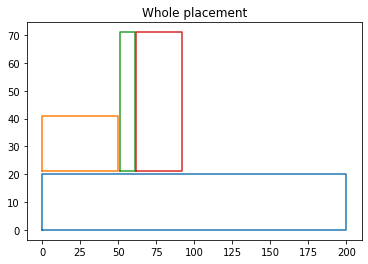

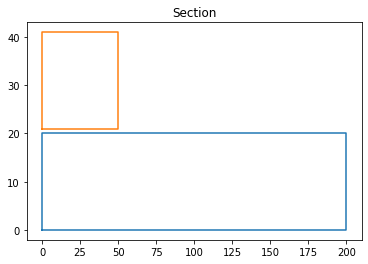

In [10]:
placement = [
    geometric_form.create_rectangle(height=20, width=200),
    geometric_form.create_rectangle(origin=vertex.Vertex(0, 21), height=20, width=50),
    geometric_form.create_rectangle(origin=vertex.Vertex(51, 21), height=50, width=10),
    geometric_form.create_rectangle(origin=vertex.Vertex(62, 21), height=50, width=30),
]

plot_polylines(placement, title="Whole placement")

# Main code
section_selector = SectionSelector(placement=placement, limit=50)
section = section_selector.filter()

plot_polylines(section, title="Section")

Goal: Create a new SectionSelector using numpy and an Adapter to plug it to the code.
Can you draw the associated UML ?

In [11]:
# Your code here

print(solution.exercise_3.task())
print(solution.exercise_3.goal())
print(solution.exercise_3.solution())

Task:  Create a new SectionSelector using numpy and an Adapter to plug it to the code. Can you draw the associated UML ?
Goal:  
Solution:  
        def to_polyline(numpy_poly):
            return polyline.Polyline(
                    [vertex.Vertex(x, y) for x, y in list(zip(*numpy_poly))]
            )
        
        
        class NewSectionSelector():
            def __init__(self, limit, placement):
                self.limit = limit
                self.placement = placement
        
            def new_filter(self):
                return [poly for poly in self.placement if poly[1].max() < self.limit]
           
            
        class Adapter(SectionSelector, NewSectionSelector):
            def filter(self):
                self.placement = [poly.to_numpy() for poly in self.placement]
                section = self.new_filter()
                return [to_polyline(numpy_poly) for numpy_poly in section]
                
        new_section_selector = Adapter(placement=pla

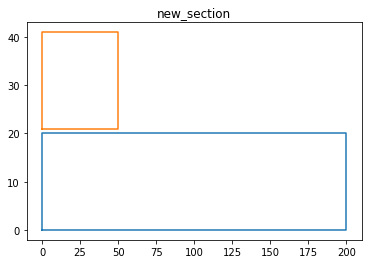

In [12]:
def to_polyline(numpy_poly):
            return polyline.Polyline(
                    [vertex.Vertex(x, y) for x, y in list(zip(*numpy_poly))]
            )
        
        
class NewSectionSelector():
    def __init__(self, limit, placement):
        self.limit = limit
        self.placement = placement

    def new_filter(self):
        return [poly for poly in self.placement if poly[1].max() < self.limit]


class Adapter(SectionSelector, NewSectionSelector):
    def filter(self):
        self.placement = [poly.to_numpy() for poly in self.placement]
        section = self.new_filter()
        return [to_polyline(numpy_poly) for numpy_poly in section]

new_section_selector = Adapter(placement=placement, limit=50)
new_section = new_section_selector.filter()

plot_polylines(new_section, "new_section")